In [8]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, exposure, color, feature, transform
import os

In [10]:
def imNormalize(image):
    if len(image.shape)==2:
        r = image
        g = image
        b = image
    else:
        r = image[:,:,0]
        g = image[:,:,1]
        b = image[:,:,2]
    
    r = r - r.min()
    r = r / r.max()
    r = np.uint8(r * 255)
    
    g = g - g.min()
    g = g / g.max()
    g = np.uint8(g * 255)
    
    b = b - b.min()
    b = b / b.max()
    b = np.uint8(b * 255)
    
    return np.stack((r,g,b),axis=2) 


def colorHistogram(image):
    image = imNormalize(image)
    image = color.rgb2hsv(image)
    
    h1 = exposure.histogram(image[:,:,0])
    h2 = exposure.histogram(image[:,:,1])
    h3 = exposure.histogram(image[:,:,2])
    h = np.concatenate((h1[0],h2[0],h3[0]), axis = None)
    h = h / (image.shape[0]*image.shape[1])
    return h

In [3]:
path = 'data/caltech-101/'
names = os.listdir(path+'/101_ObjectCategories')
names

['gerenuk',
 'hawksbill',
 'headphone',
 'ant',
 'butterfly',
 'lamp',
 'strawberry',
 'water_lilly',
 'chandelier',
 'dragonfly',
 'crab',
 'pagoda',
 'dollar_bill',
 'emu',
 'inline_skate',
 'platypus',
 'dalmatian',
 'cup',
 'airplanes',
 '.DS_Store',
 'joshua_tree',
 'cougar_body',
 'grand_piano',
 'trilobite',
 'brontosaurus',
 'wild_cat',
 'pigeon',
 'dolphin',
 'soccer_ball',
 'wrench',
 'scorpion',
 'flamingo_head',
 'nautilus',
 'accordion',
 'cougar_face',
 'pyramid',
 'camera',
 'barrel',
 'schooner',
 'cellphone',
 'panda',
 'revolver',
 'lobster',
 'menorah',
 'lotus',
 'stapler',
 'crocodile',
 'chair',
 'helicopter',
 'minaret',
 'starfish',
 'ceiling_fan',
 'ketch',
 'mayfly',
 'wheelchair',
 'bass',
 'yin_yang',
 'crocodile_head',
 'saxophone',
 'beaver',
 'mandolin',
 'bonsai',
 'Leopards',
 'car_side',
 'ibis',
 'electric_guitar',
 'kangaroo',
 'stegosaurus',
 'ferry',
 'snoopy',
 'umbrella',
 'rhino',
 'okapi',
 'watch',
 'brain',
 'gramophone',
 'scissors',
 'roost

In [4]:
newlist = []
for item in names:
    try:
        os.listdir(path+'/101_ObjectCategories/'+item)
        newlist.append(item)
    except:
        continue
newlist

['gerenuk',
 'hawksbill',
 'headphone',
 'ant',
 'butterfly',
 'lamp',
 'strawberry',
 'water_lilly',
 'chandelier',
 'dragonfly',
 'crab',
 'pagoda',
 'dollar_bill',
 'emu',
 'inline_skate',
 'platypus',
 'dalmatian',
 'cup',
 'airplanes',
 'joshua_tree',
 'cougar_body',
 'grand_piano',
 'trilobite',
 'brontosaurus',
 'wild_cat',
 'pigeon',
 'dolphin',
 'soccer_ball',
 'wrench',
 'scorpion',
 'flamingo_head',
 'nautilus',
 'accordion',
 'cougar_face',
 'pyramid',
 'camera',
 'barrel',
 'schooner',
 'cellphone',
 'panda',
 'revolver',
 'lobster',
 'menorah',
 'lotus',
 'stapler',
 'crocodile',
 'chair',
 'helicopter',
 'minaret',
 'starfish',
 'ceiling_fan',
 'ketch',
 'mayfly',
 'wheelchair',
 'bass',
 'yin_yang',
 'crocodile_head',
 'saxophone',
 'beaver',
 'mandolin',
 'bonsai',
 'Leopards',
 'car_side',
 'ibis',
 'electric_guitar',
 'kangaroo',
 'stegosaurus',
 'ferry',
 'snoopy',
 'umbrella',
 'rhino',
 'okapi',
 'watch',
 'brain',
 'gramophone',
 'scissors',
 'rooster',
 'cannon'

In [5]:
print(len(names))
print(len(newlist))

103
102


In [27]:
features = []
labels = []
for name in newlist:
    imagelist = os.listdir(path+'/101_ObjectCategories/'+name)
    print(name)
    # This is to eliminate the 'Thumbs.db' filename from the list
    if imagelist[-1]=='Thumbs.db':
        imagelist = imagelist[:-1]
    for filename in imagelist:
        image = io.imread(path+'/101_ObjectCategories/'+name+'/'+filename)
        image = transform.resize(image, [256,256])
        image = imNormalize(image)
        # fd = feature.hog(image, orientations=8, pixels_per_cell=(16, 16),
        #             cells_per_block=(1, 1), visualize=False, feature_vector=True, channel_axis=2)
        # features.append(fd)
        features.append(colorHistogram(image))
        labels.append([name,path+'/101_ObjectCategories/'+name+'/'+filename])
features = np.array(features)
labels = np.array(labels)
print(features.shape)
print(labels.shape)


gerenuk
hawksbill
headphone
ant
butterfly
lamp
strawberry
water_lilly
chandelier
dragonfly
crab
pagoda
dollar_bill
emu
inline_skate
platypus
dalmatian
cup
airplanes
joshua_tree
cougar_body
grand_piano
trilobite
brontosaurus
wild_cat
pigeon
dolphin
soccer_ball
wrench
scorpion
flamingo_head
nautilus
accordion
cougar_face
pyramid
camera
barrel
schooner
cellphone
panda
revolver
lobster
menorah
lotus
stapler
crocodile
chair
helicopter
minaret
starfish
ceiling_fan
ketch
mayfly
wheelchair
bass
yin_yang
crocodile_head
saxophone
beaver
mandolin
bonsai
Leopards
car_side
ibis
electric_guitar
kangaroo
stegosaurus
ferry
snoopy
umbrella
rhino
okapi
watch
brain
gramophone
scissors
rooster
cannon
binocular
anchor
octopus
buddha
laptop
windsor_chair
hedgehog
pizza
euphonium
stop_sign
Motorbikes
sea_horse
flamingo
BACKGROUND_Google
ewer
garfield
crayfish
Faces_easy
Faces
sunflower
llama
elephant
tick
metronome
(9145, 768)
(9145, 2)


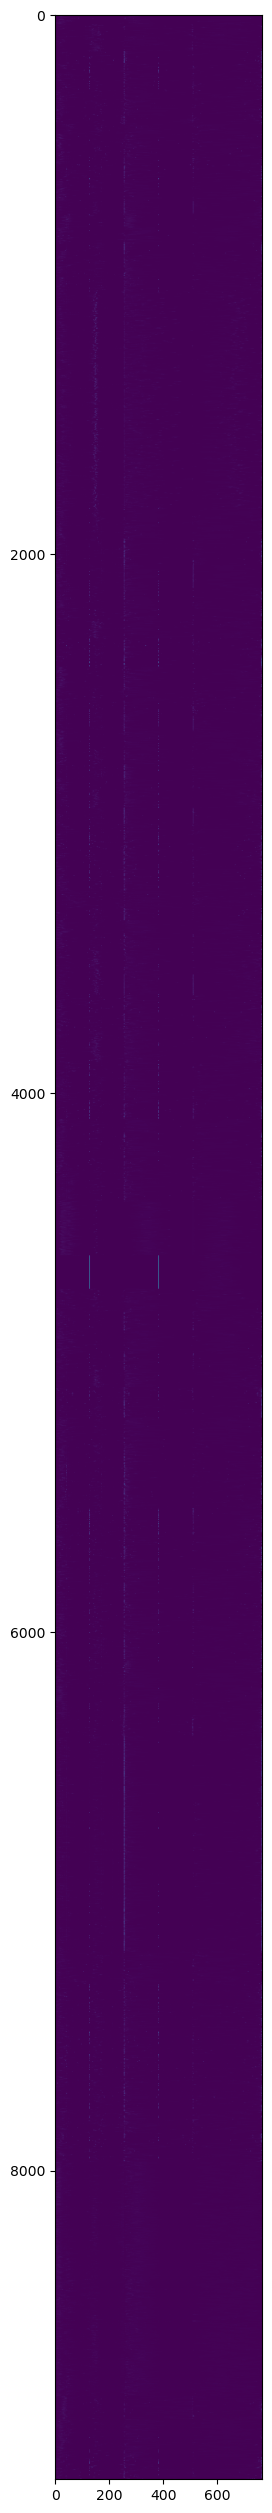

In [28]:
fig = plt.figure(figsize=(16,32))
plt.imshow(features)
plt.show()


1971


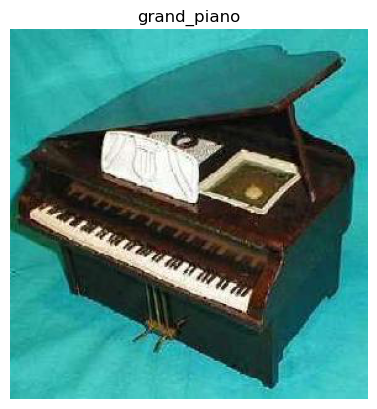

In [34]:
querynum = np.random.randint(len(labels))
print(querynum)
queryimage = io.imread(labels[querynum,1])
plt.imshow(queryimage)
plt.axis('off')
plt.title(labels[querynum,0])
plt.show()

In [35]:
def euclideanDistance(a,b):
    a = np.array(a)
    b = np.array(b)
    return np.sqrt(np.sum((a-b)**2))

def manhattanDistance(a,b):
    a = np.array(a)
    b = np.array(b)
    return np.sum(np.abs(a-b))

In [36]:
distances = np.zeros(len(labels))
for i in range(len(labels)):
    distances[i] = euclideanDistance(features[querynum,:],features[i,:])
    #distances[i] = manhattanDistance(features[querynum,:],features[i,:])
    line = '\rProcessing '+ str(i+1) + ' of '+ str(len(labels))
    print(line, end='')
    
order = np.argsort(distances)
order

Processing 9145 of 9145

array([1971, 7815, 2591, ..., 2406, 2388, 2404])

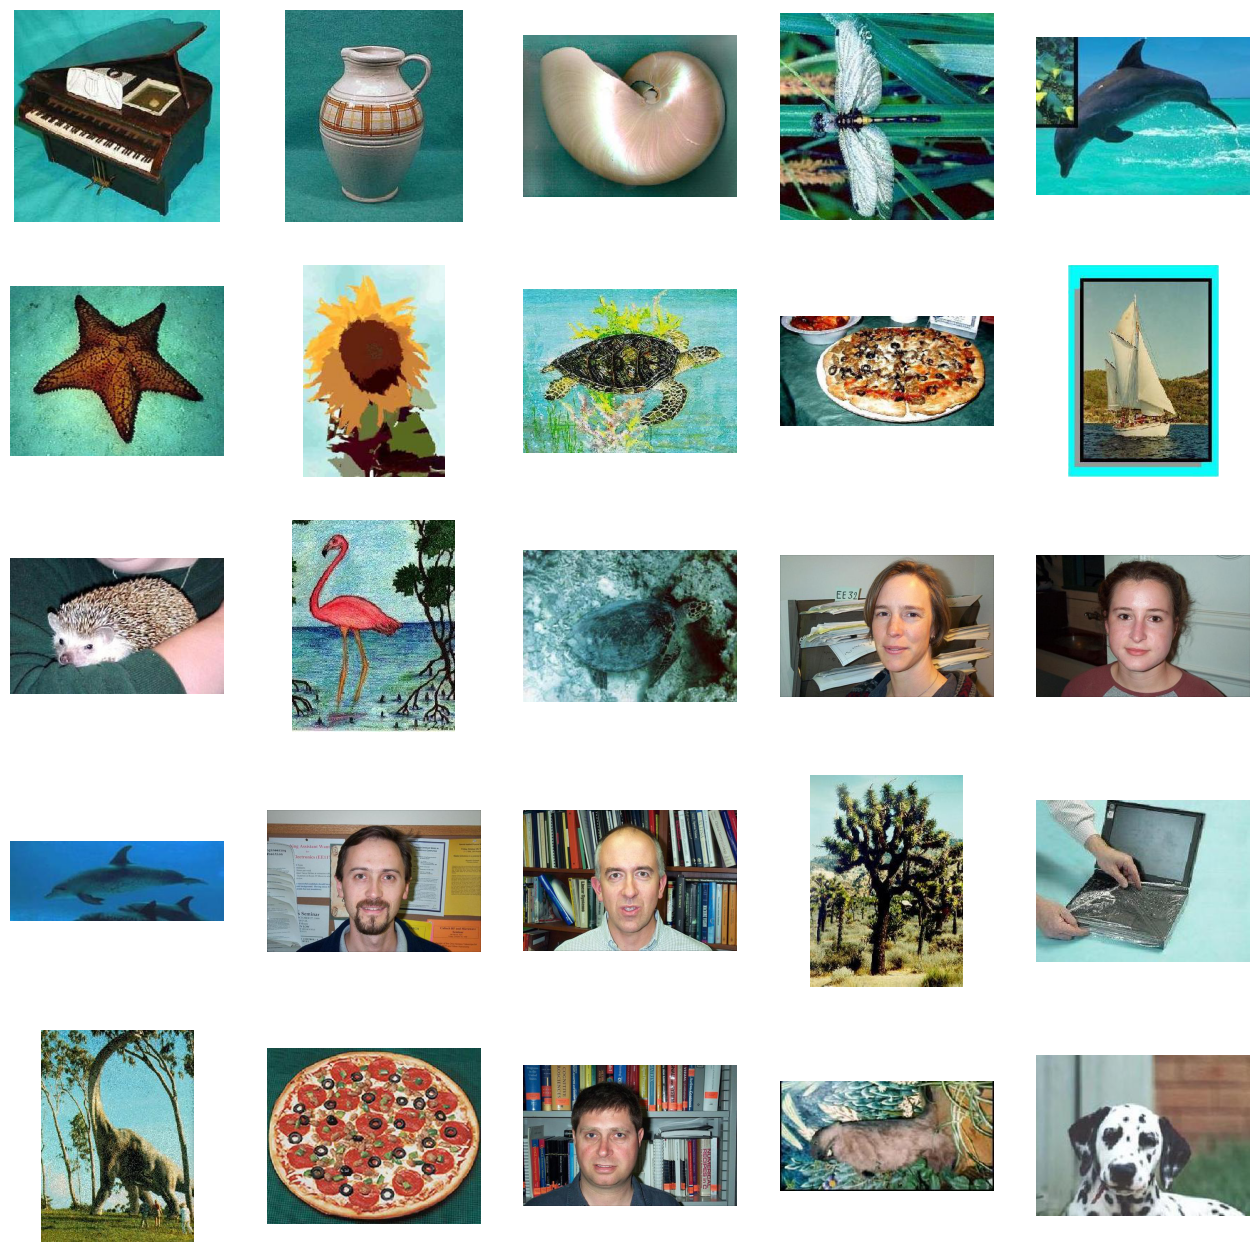

In [37]:
fig = plt.figure(figsize=[16,16])
rows = 5
cols = 5
for i in range(rows*cols):
    image = io.imread(labels[order[i],1])
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(image)
    plt.axis('off')

plt.show()